In [1]:
import os
import pandas as pd
pd.set_option('display.max_rows', 3000)

In [109]:
import numpy as np
import nibabel as nib # NEUROIMAGEING IN PYTHON
import itk # insight segmentation and registration
import SimpleITK as sitk
import itkwidgets 
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

Totally 346 patients, train: 204, test: 142.

In [3]:
dicom_root = "/project2/msca/projects/ProstateMRI/data/PROSTATEx-team1/ProstateX/Train/PROSTATEx/"
intermediate_folder = "/project2/msca/projects/ProstateMRI/data/PROSTATEx-team1/ProstateX/Train/intermediate/"
outputdirectory = os.path.join(intermediate_folder, 'nrrd-test')

In [26]:
train_nrrds = os.listdir('/project2/msca/projects/ProstateMRI/data/PROSTATEx-team1/ProstateX/Train/DATAPREP/nrrd-train/')
test_nrrds = os.listdir('/project2/msca/projects/ProstateMRI/data/PROSTATEx-team1/ProstateX/Test/DATAPREP/nrrd-test/')

In [27]:
train = pd.DataFrame(train_nrrds, columns = ['file'])
test = pd.DataFrame(test_nrrds, columns = ['file'])

In [28]:
train['pid'] = train.file.apply(lambda x: x.split('_',1)[0])
train['series'] = train.file.apply(lambda x: x.split('_',1)[1])
test['pid'] = test.file.apply(lambda x: x.split('_',1)[0])
test['series'] = test.file.apply(lambda x: x.split('_',1)[1])

In [29]:
train

,file,pid,series
0,ProstateX-0147_Ktrans.nrrd,ProstateX-0147,Ktrans.nrrd
1,ProstateX-0162_ep2d_diff_tra_DYNDISTCALC_BVAL_...,ProstateX-0162,ep2d_diff_tra_DYNDISTCALC_BVAL_8.nrrd
2,ProstateX-0130_t2_tse_sag_3.nrrd,ProstateX-0130,t2_tse_sag_3.nrrd
3,ProstateX-0059_ep2d_diff_tra_DYNDISTCALC_BVAL_...,ProstateX-0059,ep2d_diff_tra_DYNDISTCALC_BVAL_9.nrrd
4,ProstateX-0058_Ktrans.nrrd,ProstateX-0058,Ktrans.nrrd
5,ProstateX-0012_ep2d_diff_tra_DYNDIST_ADC_8.nrrd,ProstateX-0012,ep2d_diff_tra_DYNDIST_ADC_8.nrrd
6,ProstateX-0013_t2_tse_sag_3.nrrd,ProstateX-0013,t2_tse_sag_3.nrrd
7,ProstateX-0121_t2_tse_tra_4.nrrd,ProstateX-0121,t2_tse_tra_4.nrrd
8,ProstateX-0110_Ktrans.nrrd,ProstateX-0110,Ktrans.nrrd
9,ProstateX-0024_Ktrans.nrrd,ProstateX-0024,Ktrans.nrrd


In [30]:
train = train[['pid','series']].sort_values(by = 'pid')
test = test[['pid','series']].sort_values(by = 'pid')

In [31]:
train

,pid,series
137,ProstateX-0000,ep2d_diff_tra_DYNDISTCALC_BVAL_8.nrrd
755,ProstateX-0000,t2_tse_cor_5.nrrd
825,ProstateX-0000,ep2d_diff_tra_DYNDIST_ADC_7.nrrd
541,ProstateX-0000,t2_tse_tra_4.nrrd
287,ProstateX-0000,Ktrans.nrrd
597,ProstateX-0000,t2_tse_sag_3.nrrd
947,ProstateX-0001,t2_tse_tra_10.nrrd
60,ProstateX-0001,ep2d_diff_tra_DYNDIST_MIXCALC_BVAL_9.nrrd
10,ProstateX-0001,t2_tse_cor_5.nrrd
242,ProstateX-0001,t2_tse_sag_4.nrrd


In [32]:
import re
series = re.compile(r'BVAL|t2_tse_sag|t2_tse_cor|t2_tse_tra|Ktrans|ADC')
train['se_des'] = train.series.apply(lambda x: series.search(x).group())
test['se_des'] = test.series.apply(lambda x: series.search(x).group())

In [33]:
train

,pid,series,se_des
137,ProstateX-0000,ep2d_diff_tra_DYNDISTCALC_BVAL_8.nrrd,BVAL
755,ProstateX-0000,t2_tse_cor_5.nrrd,t2_tse_cor
825,ProstateX-0000,ep2d_diff_tra_DYNDIST_ADC_7.nrrd,ADC
541,ProstateX-0000,t2_tse_tra_4.nrrd,t2_tse_tra
287,ProstateX-0000,Ktrans.nrrd,Ktrans
597,ProstateX-0000,t2_tse_sag_3.nrrd,t2_tse_sag
947,ProstateX-0001,t2_tse_tra_10.nrrd,t2_tse_tra
60,ProstateX-0001,ep2d_diff_tra_DYNDIST_MIXCALC_BVAL_9.nrrd,BVAL
10,ProstateX-0001,t2_tse_cor_5.nrrd,t2_tse_cor
242,ProstateX-0001,t2_tse_sag_4.nrrd,t2_tse_sag


In [91]:
nseries_by_patient_train = train.groupby('pid')['se_des'].count()
nseries_by_patient_test = test.groupby('pid')['se_des'].count()
nseries_by_patient_train

pid
ProstateX-0000     6
ProstateX-0001     7
ProstateX-0002     6
ProstateX-0003     6
ProstateX-0004     6
ProstateX-0005     6
ProstateX-0006     6
ProstateX-0007     7
ProstateX-0008     7
ProstateX-0009     6
ProstateX-0010     7
ProstateX-0011     7
ProstateX-0012     7
ProstateX-0013     6
ProstateX-0014     6
ProstateX-0015     6
ProstateX-0016     6
ProstateX-0017     6
ProstateX-0018     6
ProstateX-0019     7
ProstateX-0020     6
ProstateX-0021     6
ProstateX-0022     6
ProstateX-0023     6
ProstateX-0024     6
ProstateX-0025     6
ProstateX-0026     6
ProstateX-0027     6
ProstateX-0028     6
ProstateX-0029     6
ProstateX-0030     6
ProstateX-0031     9
ProstateX-0032     7
ProstateX-0033     6
ProstateX-0034     7
ProstateX-0035     6
ProstateX-0036     6
ProstateX-0037     6
ProstateX-0038     6
ProstateX-0039     6
ProstateX-0040     6
ProstateX-0041     6
ProstateX-0042     7
ProstateX-0043     6
ProstateX-0044     6
ProstateX-0045     6
ProstateX-0046     6
ProstateX

In [34]:
series_count_train = train.groupby('se_des').count()
series_count_test = test.groupby('se_des').count()

In [35]:
series_count_train

,pid,series
se_des,,
ADC,210,210
BVAL,208,208
Ktrans,204,204
t2_tse_cor,206,206
t2_tse_sag,218,218
t2_tse_tra,256,256


In [36]:
series_count_test

,pid,series
se_des,,
ADC,145,145
BVAL,142,142
Ktrans,121,121
t2_tse_cor,142,142
t2_tse_sag,153,153
t2_tse_tra,174,174


In [70]:
# each patient should have 6 unique series ideally, but some of them have more than 6 series, keep in mind
n_series_train = train.groupby('pid')['series'].count()
n_series_train.value_counts()

6     142
7      52
8       7
9       2
12      1
Name: series, dtype: int64

In [71]:
# each patient should have 6 unique series ideally, but some of them have more than 6 series, keep in mind
n_series_test = test.groupby('pid')['series'].count()
n_series_test.value_counts()

6    91
7    27
5    17
8     6
9     1
Name: series, dtype: int64

# Read in csv
The distribution of zones between test and train are similar. There are only 2 observations in SV zone for both train and test. PZ, TZ are two largest zones, which have imbalanced T/Fs.
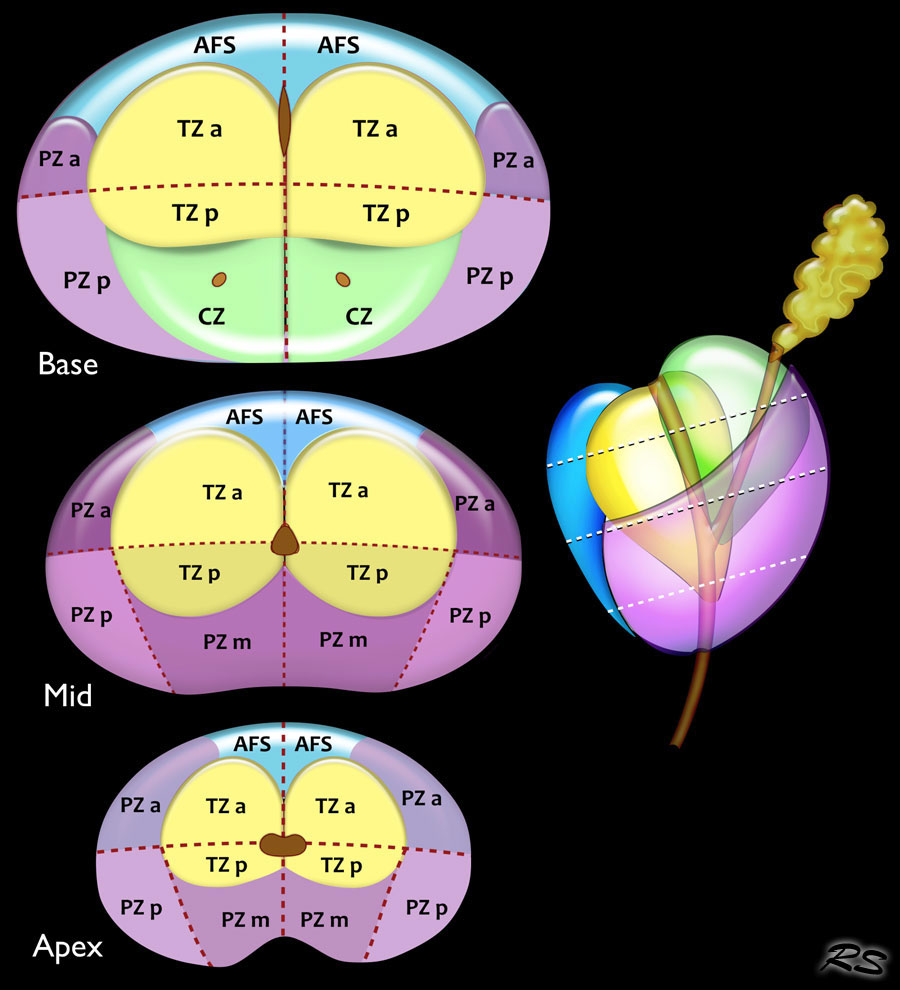

In [25]:
train_finding = pd.read_csv('/project2/msca/projects/ProstateMRI/data/PROSTATEx-team1/Training_Lesion_Information/ProstateX-Findings-Train.csv')
train_ktrans = pd.read_csv('/project2/msca/projects/ProstateMRI/data/PROSTATEx-team1/Training_Lesion_Information/ProstateX-Images-KTrans-Train.csv')
train_images = pd.read_csv('/project2/msca/projects/ProstateMRI/data/PROSTATEx-team1/Training_Lesion_Information/ProstateX-Images-Train.csv')

In [37]:
test_finding = pd.read_csv('/project2/msca/projects/ProstateMRI/data/PROSTATEx-team1/Test_Lesion_Information/ProstateX-Findings-Test.csv')
test_ktrans = pd.read_csv('/project2/msca/projects/ProstateMRI/data/PROSTATEx-team1/Test_Lesion_Information/ProstateX-Images-KTrans-Test.csv')
test_images = pd.read_csv('/project2/msca/projects/ProstateMRI/data/PROSTATEx-team1/Test_Lesion_Information/ProstateX-Images-Test.csv')

In [38]:
train_finding.head()

,ProxID,fid,pos,zone,ClinSig
0,ProstateX-0000,1,25.7457 31.8707 -38.511,PZ,True
1,ProstateX-0001,1,-40.5367071921656 29.320722668457 -16.70766907...,AS,False
2,ProstateX-0002,1,-27.0102 41.5467 -26.0469,PZ,True
3,ProstateX-0002,2,-2.058 38.6752 -34.6104,PZ,False
4,ProstateX-0003,1,22.1495 31.2717 -2.45933,TZ,False


In [52]:
train_count_by_zone = pd.DataFrame(train_finding.groupby(['zone','ClinSig'])['zone'].count())
train_count_by_zone 

zone
zone ClinSig      
AS   False      24
     True       31
PZ   False     155
     True       36
SV   False       2
TZ   False      73
     True        9

In [53]:
test_count_by_zone = pd.DataFrame(train_finding.groupby(['zone'])['zone'].count())
test_count_by_zone 

,zone
zone,
AS,55
PZ,191
SV,2
TZ,82


# Read nrrd data

In [105]:
example_filename = '/project2/msca/projects/ProstateMRI/data/PROSTATEx-team1/ProstateX/Train/DATAPREP/nrrd-train/ProstateX-0001_t2_tse_cor_5.nrrd'

In [110]:
data = sitk.ReadImage(example_filename)
LabelImageArray = sitk.GetArrayFromImage(data)
LabelImageArray

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   1,   1, ...,  67,  78,   9],
        [  0,   4,   0, ...,  82,  76,   7],
        ...,
        [  0,   0,   0, ..., 380, 405,   0],
        [  0,   5,   0, ..., 347, 378,   6],
        [  0,   2,  10, ..., 112, 106,  41]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   1,   0, ...,  68, 106,  11],
        [  0,   6,   0, ...,  78, 121,   3],
        ...,
        [  0,   0,   0, ..., 417, 449,   0],
        [  0,   4,   0, ..., 393, 406,   0],
        [  0,   3,  12, ..., 135,  97,  26]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ..., 186, 261,  38],
        [  0,   7,   0, ..., 252, 294,   0],
        ...,
        [  0,   0,   0, ..., 206, 247,   0],
        [  0,   3,   0, ..., 179, 218,   0],
        [  0,   6,   5, ...,  75,  69,  24]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   1, ...,   0,   4,   3],
        [  0,   2,   2, ...,  93,  69,   4

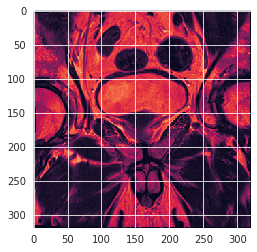

In [115]:
plt.imshow(LabelImageArray[2])